In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from master_function import data_preprocessing, plot_train_test_values
from master_function import calculate_accuracy, model_bias
from sklearn.metrics import mean_squared_error



In [9]:
start_date = '1990-01-01'
end_date = '2023-06-01'

#Fetch S&P 500 price dataset

data = np.array((pdr.get_data_fred('SP500', start = start_date, end = end_date)).dropna())

data = np.diff((data[:,0]))

#Hyperparameters specification

num_lags =100
train_test_split = 0.8
num_neurons_in_hidden_layers = 20
num_epochs = 100
batch_size = 32



Epoch 1/100


c:\Users\goeld\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 806.5729
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 926.4911
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 874.3875
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 782.2567
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1165.4899
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 855.2829
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 893.4623
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 955.1053
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 832.7123
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1129.6801
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 911.3926
Epoch 12/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 799.7197
Epoch 13/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1077.5540
Epoch 14/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 898.3969
Epoch 15/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1

c:\Users\goeld\anaconda3\master_function.py:175: RuntimeWarning: invalid value encountered in divide
  plotting_time_series[0:first, 1] = plotting_time_series[0:first, 1] / 0
c:\Users\goeld\anaconda3\master_function.py:176: RuntimeWarning: invalid value encountered in divide
  plotting_time_series[0:first, 2] = plotting_time_series[0:first, 2] / 0
c:\Users\goeld\anaconda3\master_function.py:177: RuntimeWarning: invalid value encountered in divide
  plotting_time_series[first:, 0] = plotting_time_series[first:, 0] / 0


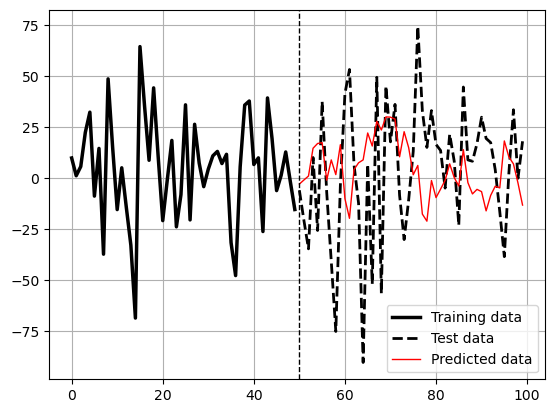

In [10]:
x_train, y_train, x_test, y_test = data_preprocessing(data, num_lags, train_test_split)

model = Sequential()

#First hidden layer with ReLU as activation function
model.add(LSTM(units = num_neurons_in_hidden_layers, input_shape = (num_lags, 1)))

#Second Hidden Layer
model.add(Dense(num_neurons_in_hidden_layers, activation= 'relu'))

#Output Layer
model.add(Dense(units = 1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

#Fitting the model

model.fit(x_train, np.reshape(y_train, (-1,1)), epochs = num_epochs, batch_size= batch_size)

y_predicted_train = np.reshape(model.predict(x_train), (-1, 1))

#Predicting out-of-sample

y_predicted = np.reshape(model.predict(x_test), (-1,1))

plot_train_test_values(100, 50, y_train, y_test, y_predicted)



In [11]:
# performance evaluation

print('---------')
print('Model Accuracy over the Training Dataset =', round(calculate_accuracy(y_predicted_train, y_train), 2), '%')
print('Model Accuracy over the test Dataset =', round(calculate_accuracy(y_predicted, y_test), 2), '%')
print('Root Mean Square Error over Training Dataset=', round(np.sqrt(mean_squared_error(y_predicted_train, y_train)), 10))
print('Root Mean Square error over test Dataset =', round(np.sqrt(mean_squared_error(y_predicted, y_test)), 10) )
print('Correlation In-Sample Predicted /Train =', round(np.corrcoef(np.reshape(y_predicted_train, (-1)), y_train)[0][1], 3))
print('Correlation out-of-sample Predicted/Test =', round(np.corrcoef(np.reshape(y_predicted, (-1)), np.reshape(y_test, (-1)))[0][1], 3))
print('Model Bias =', round(model_bias(y_predicted), 2))
print('---------')

---------
Model Accuracy over the Training Dataset = 65.19 %
Model Accuracy over the test Dataset = 48.62 %
Root Mean Square Error over Training Dataset= 27.3728750423
Root Mean Square error over test Dataset = 56.8217582604
Correlation In-Sample Predicted /Train = 0.47
Correlation out-of-sample Predicted/Test = 0.012
Model Bias = 2.23
---------
